In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

# 한글
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
elif platform.system() == "Darwin":
    rc('font', family = 'AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 분할표 사용 - 범주형과 범주형 데이터의 분포 확인
lc_loans = pd.read_csv('./data/lc_loans.csv')
# print(lc_loans)

# grade 별로 status 의 개수를 확인
crosstab = lc_loans.pivot_table(index = 'grade', columns= 'status',
                                aggfunc= lambda x : len(x), margins = True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [6]:
# grade 의 비율을 표시하기 위한 교차 분할표
df = crosstab.copy().loc['A':'G'] # 복제
df.loc[:, 'Charged Off' : 'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis = 0)
df['All'] = df['All'] / sum(df['All'])
print(df)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


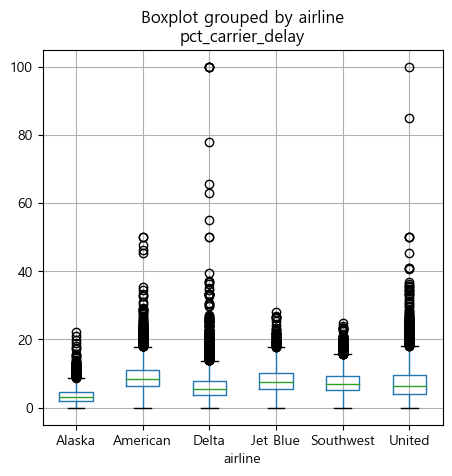

In [10]:
# 범주형과 수치형 데이터 분포 확인
airline_stats = pd.read_csv('./data/airline_stats.csv')
# print(airline_stats)

ax = airline_stats.boxplot(by = 'airline', column= 'pct_carrier_delay',
                           figsize= (5, 5))
plt.show()

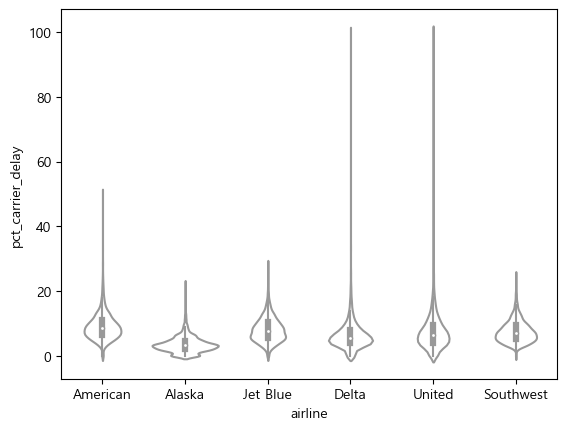

In [12]:
import seaborn as sns
sns.violinplot(data = airline_stats, x = 'airline', y = 'pct_carrier_delay', color= 'white')
plt.show()

In [13]:
pip install pgmpy

  Obtaining dependency information for pgmpy from https://files.pythonhosted.org/packages/47/f5/76a8f03cb9708c4183ce508930511876e1db868466087e6dbc62810f8c5c/pgmpy-0.1.23-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ------- -------------------------------- 0.4/1.9 MB 11.6 MB/s eta 0:00:01
   ---------------- ----------------------- 0.8/1.9 MB 10.0 MB/s eta 0:00:01
   ------------------------------ --------- 1.5/1.9 MB 11.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.8/1.9 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
# 병에 걸릴 확률과 병에 걸리지 않을 확률 생성
from pgmpy.factors.discrete import TabularCPD

cpd_X = TabularCPD('X', 2, [[0.998],[0.002]])
print(cpd_X)

+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+


In [19]:
# 진단 시약의 판단 여부를 대입해서 확률 모형을 생성
# 정상인 경우 정상으로 판단 95% 잘못판단 5%
# 병에 걸린 경우 병에 걸리지 않았다고 판단 1% 양성으로 판단 99%
cpd_Y_on_X = TabularCPD('Y', 2, np.array([[0.95, 0.01], [0.05, 0.99]]),
                        evidence= ['X'], evidence_card=[2])
print(cpd_Y_on_X)

# 모델 생성
from pgmpy.models import BayesianModel
model = BayesianModel([('X', 'Y')])
model.add_cpds(cpd_X, cpd_Y_on_X)
print(model.check_model())

# 양성으로 나왔을 때 확률
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)
# Y 값이 1이면 양성으로 나왔을 때 병에 걸리지 않앗을 확률과 병에 걸릴 확률
# Y 값이 0이면 음성으로 나왔을 때 병에 걸리지 않았을 확률과 병에 걸릴 확률
print(inference.query(['X'], evidence= {'Y' : 1}))

+------+------+------+
| X    | X(0) | X(1) |
+------+------+------+
| Y(0) | 0.95 | 0.01 |
+------+------+------+
| Y(1) | 0.05 | 0.99 |
+------+------+------+
True
+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.9618 |
+------+----------+
| X(1) |   0.0382 |
+------+----------+


In [22]:
import seaborn as sns
import scipy as sp
import scipy.stats

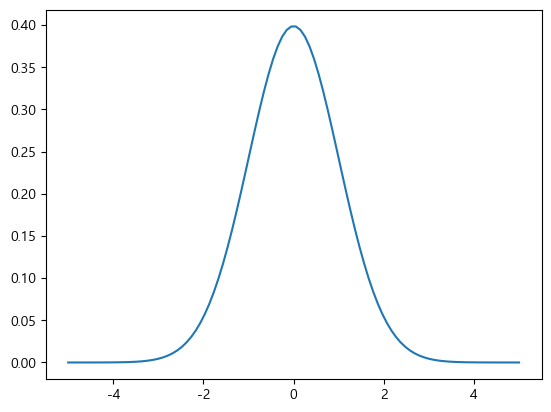

In [23]:
# 정규 분포 만들기
# 평균과 표준 편차
mu = 0 # 평균 0
std = 1 # 표준편차 1
rv = sp.stats.norm(mu, std) # 정규 분포 객체 생성
xx = np.linspace(-5, 5, 100) # 샘플 데이터 100개를 생성

plt.plot(xx, rv.pdf(xx))

[-0.10139156 -0.73850009 -0.76669711  2.1306444  -1.06958031 -0.75980013
 -1.8585769   1.07093552 -0.04818245  0.60162333  0.87139235 -0.01138121
  0.10817879  0.85517458  1.15703158 -0.34862935  0.13220917  0.20724357
  0.3934711   0.42236021  0.68318501  0.35824985 -0.14115251 -0.11885415
 -1.25389741  0.05605381  0.88285642 -1.44074376 -1.22158631 -1.85604372
  1.06322625 -0.75717609  0.55143168  1.01811651 -0.58149665 -0.15227154
  1.4028567   0.24048034 -0.68058402  0.36418578  0.64345707 -0.38630966
  0.58912779 -0.02648887  0.38097145  1.22120209 -1.23618424 -1.5800858
 -0.58730741  1.48808494 -0.42688953 -0.84103795  0.26065692 -0.15720572
 -1.08311906  0.29076921  0.16614341  1.00673911  0.35835596 -0.05184435
  1.24585196 -0.25213725 -0.56397406 -0.90567941 -0.17999746  0.10760099
 -0.13193686  1.83012979  1.07124144  0.58611091 -0.7898054   0.21402407
  1.68399718  1.58889979  3.27776129  0.92297569  1.1450103  -1.50682936
  1.57048582 -0.52304823  0.27207229  0.50879915  2.

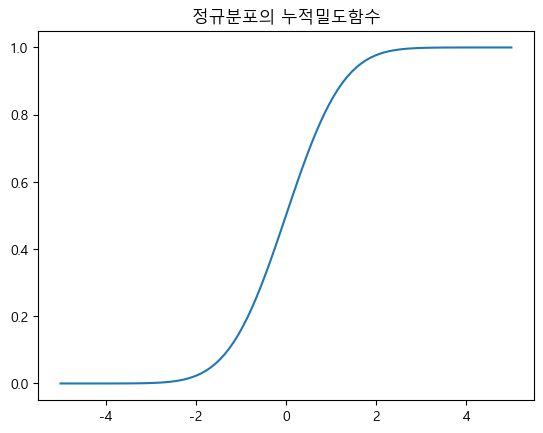

In [25]:
x = rv.rvs(100) # 샘플링
print(x)

# 누적 밀도 하수
plt.plot(xx, rv.cdf(xx))
plt.title('정규분포의 누적밀도함수')
plt.show()

In [26]:
pip install pandas-datareader

     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     -------------------------------------- 109.5/109.5 kB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


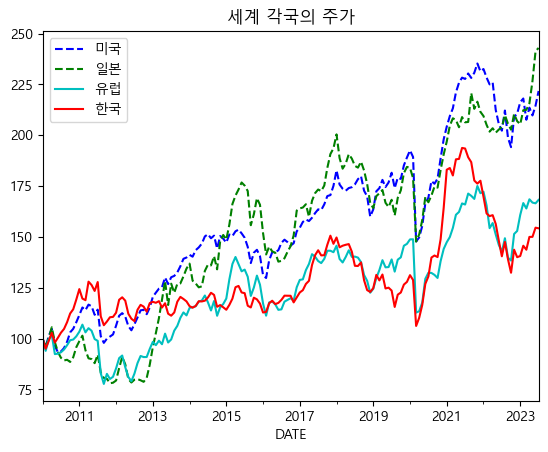

In [28]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 8, 22)

# 가져올 국가의 주가 지수 코드
symbols = ['SPASTT01USM661N', 'SPASTT01JPM661N', 'SPASTT01EZM661N','SPASTT01KRM661N']

data = pd.DataFrame()

for symbol in symbols:
    data[symbol] = web.DataReader(symbol, data_source = 'fred',
                                  start = '2010-01-01', end = '2023-08-22')[symbol]

# print(data.info())
data.columns = ['미국','일본','유럽','한국']
data = data / data.iloc[0] * 100

styles = ['b--', 'g--','c','r-']
data.plot(style = styles)
plt.title('세계 각국의 주가')
plt.show()

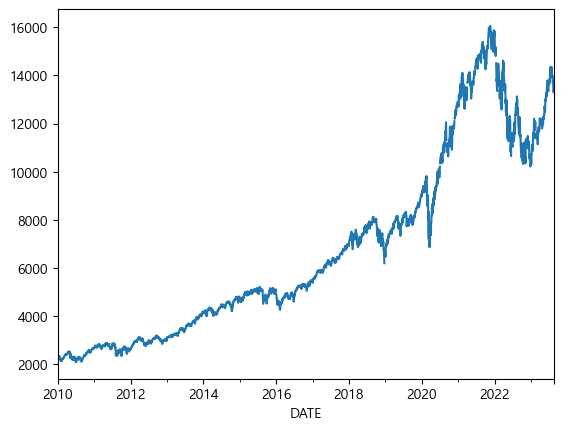

In [36]:
data = pd.DataFrame()
symbol = 'NASDAQCOM'
data[symbol] = web.DataReader(symbol, data_source= 'fred',
                              start = '2010-01-01', end = '2023-08-22')[symbol]
data.plot(legend=False)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7768\3460527923.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(daily_returns, kde = False)


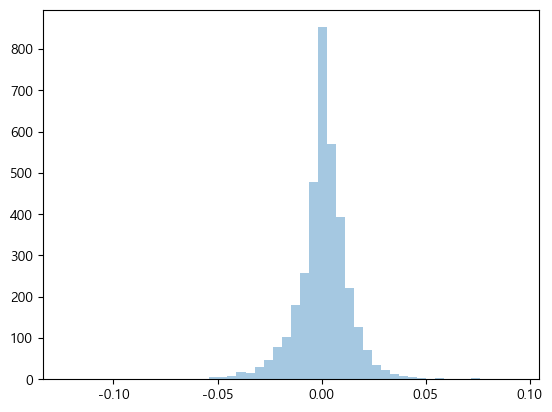

In [37]:
# 일차별 차이
daily_returns = data.pct_change().dropna()
# print(daily_returns)

# 일차별 차이를 그래프로 출력 - 정규 분포와 유사한 그래프가 그려짐
sns.distplot(daily_returns, kde = False)
plt.show()

In [39]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/e9/43/93ea65227c938a0a4a8925d7f054b050ea743044b887170da9eca210635a/yfinance-0.2.28-py2.py3-none-any.whl.metadata
  Obtaining dependency information for requests>=2.31 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/65.3 kB ? eta -:--:--
   ---------------------------------------- 65.3/65.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/62.6 kB ? eta -:--:--
   ---------------------------------------- 62.6/62.6 kB ? eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [40]:
# 특정한 회사 주가 가져오기
import yfinance as yfin

yfin.pdr_override()
# 주식 코드만 변경하면 주가 정보를 가져올 수 있음
samsung = web.get_data_yahoo('005380.KS')
print(samsung)

[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close      Adj Close   Volume
Date                                                                      
2000-01-04   19000.0   20700.0   18600.0   20700.0   12360.329102  2028300
2000-01-05   21000.0   22500.0   19500.0   20800.0   12420.043945  4091600
2000-01-06   21300.0   21700.0   19100.0   19700.0   11763.209961  1899300
2000-01-07   20900.0   21100.0   20000.0   20300.0   12121.483398  2206900
2000-01-10   21500.0   21600.0   19750.0   20000.0   11942.345703  1931800
...              ...       ...       ...       ...            ...      ...
2023-08-17  184900.0  185500.0  182600.0  184800.0  184800.000000   458036
2023-08-18  182600.0  187500.0  182600.0  186100.0  186100.000000   420787
2023-08-21  187000.0  187200.0  185300.0  186100.0  186100.000000   279766
2023-08-22  186200.0  187900.0  186200.0  187900.0  187900.000000   297596
2023-08-23  186500.0  188700.0 

C:\Users\USER\AppData\Local\Temp\ipykernel_7768\3445562728.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x1, kde = False, ax = ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_7768\3445562728.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2, kde = False, ax = ax[1])


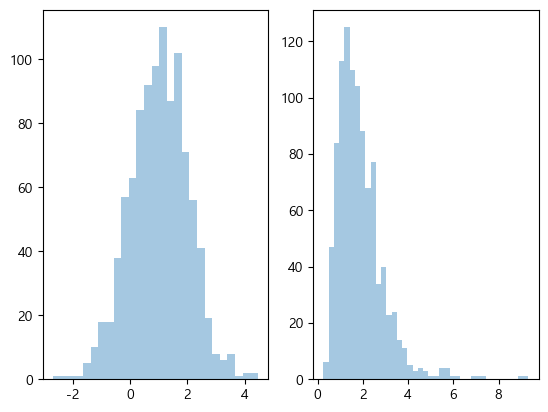

In [41]:
# 정규 분포와 로그분포
mu = 1
rv = sp.stats.norm(loc = mu)

x1 = rv.rvs(1000)
s = 0.5
x2 = np.exp(s * x1)

fig, ax = plt.subplots(1,2)
sns.distplot(x1, kde = False, ax = ax[0]) # 정규 분포
sns.distplot(x2, kde = False, ax = ax[1]) # 로그 분포
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7768\3086939419.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_poisson, bins = 30, color = 'blue', kde = False)


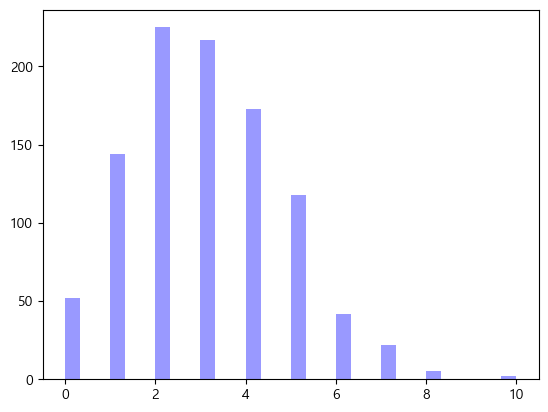

In [45]:
# 푸아송 분포
data_poisson = sp.stats.poisson.rvs(mu = 3, size = 1000)
ax = sns.distplot(data_poisson, bins = 30, color = 'blue', kde = False)
plt.show()

In [4]:
df = pd.read_csv('./data/coffee_dataset.csv')
df.info()

df_sample = df.sample(200)
df_sample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2974 non-null   int64  
 1   age            2974 non-null   object 
 2   drinks_coffee  2974 non-null   bool   
 3   height         2974 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 72.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2757 to 1212
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB
